In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ML libraries inladen
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.covariance import EllipticEnvelope
# Voor statistische data visualisatie
import seaborn as sns; sns.set(color_codes=True)

In [2]:
# Inlezen van de dataset
dataset = pd.read_csv('boston_housing.csv')

In [3]:
# Toon de eerste rijen van de dataset
dataset.tail(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price
496,0.28960,0.0,9.69,0,0.585,5.390,72.900002,2.7986,6,391,19.200001,396.899994,21.139999,413.700016
497,0.26838,0.0,9.69,0,0.585,5.794,70.599998,2.8927,6,391,19.200001,396.899994,14.100000,384.299984
498,0.23912,0.0,9.69,0,0.585,6.019,65.300003,2.4091,6,391,19.200001,396.899994,12.920000,445.200016
499,0.17783,0.0,9.69,0,0.585,5.569,73.500000,2.3999,6,391,19.200001,395.769989,15.100000,367.500000
500,0.22438,0.0,9.69,0,0.585,6.027,79.699997,2.4982,6,391,19.200001,396.899994,14.330000,352.799984
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.670000,470.399992
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.080000,432.600008
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.640000,501.899992
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.480000,462.000000
505,0.04741,0.0,11.93,0,0.573,6.030,80.800003,2.5050,1,273,21.000000,396.899994,7.880000,249.899992


In [4]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,4.673727,11.363636,11.136779,0.069170,25.892968,87.231275,68.574901,11.445487,9.549407,408.237154,18.455534,356.674030,12.653063,473.188934
std,25.223207,23.322453,6.860353,0.253994,132.093200,747.124382,28.148862,172.108941,8.707259,168.537116,2.164946,91.294863,7.141062,193.139186
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,105.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.888000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,357.525002
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,445.200016
75%,3.689388,12.500000,18.100000,0.000000,0.624000,6.630750,94.074999,5.213925,24.000000,666.000000,20.200001,396.225006,16.954999,525.000000
max,537.000000,100.000000,27.740000,1.000000,713.000000,8375.000000,100.000000,3875.000000,24.000000,711.000000,22.000000,396.899994,37.970001,1050.000000


### Beschrijving van de verschillende features:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $\$10,000$
- PTRATIO - pupil-teacher ratio by town
- B - $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
- LSTAT - % lower status of the population
# Verwijder de CHAS waarden (overal 0) is een dummy variabele
dataset.drop('CHAS', axis=1, inplace=True) #inplace vervangt huidige dataframe en axis=1 -> kolom (axis 0 is een rij)- Price - Median value of owner-occupied homes in $1000's

In [5]:
# Verwijder de CHAS waarden (overal 0) is een dummy variabele
dataset.drop('CHAS', axis=1, inplace=True) #inplace vervangt huidige dataframe en axis=1 -> kolom (axis 0 is een rij)

In [6]:
# Verwijder de alle rijen waarin uitschieters staan. 
# Uitschieters worden berekend via de 3 sigma regel. 
# 3 sigma -> 99,7 procent van de gegevens ligt binnen de -3 sigma -> + 3 sigma

from scipy import stats
dataset = dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]
dataset.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,2.649013,9.988662,10.759479,0.547575,6.265785,67.632200,3.851895,8.478458,389.045351,18.387302,375.393853,12.165329,478.785715
std,6.273766,19.941189,6.749778,0.112896,0.685393,27.997824,2.054524,8.000859,158.293650,2.164533,49.296266,6.632866,180.278859
min,0.006320,0.000000,1.250000,0.385000,3.561000,2.900000,1.169100,1.000000,188.000000,12.600000,83.449997,1.730000,105.000000
25%,0.081870,0.000000,5.190000,0.449000,5.877000,45.000000,2.122200,4.000000,277.000000,17.000000,377.730011,6.920000,380.100008
50%,0.217190,0.000000,8.140000,0.524000,6.172000,74.500000,3.375100,5.000000,311.000000,18.700001,392.200012,10.740000,455.700016
75%,1.656600,12.500000,18.100000,0.609000,6.590000,93.599998,5.231100,8.000000,432.000000,20.200001,396.899994,15.940000,525.000000
max,67.920799,80.000000,27.740000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.899994,31.990000,1050.000000


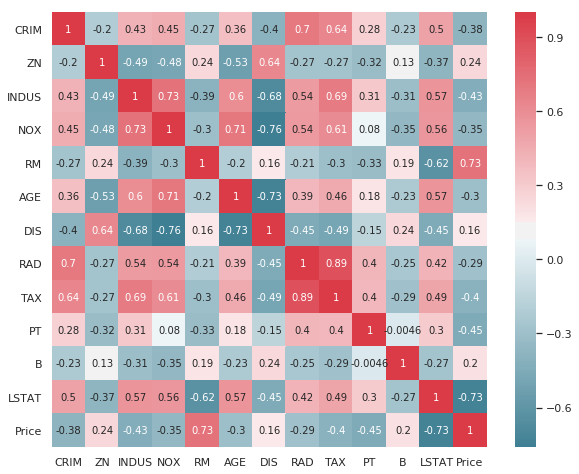

In [7]:
# Lineaire correlatie tussen de features

dataset.corr()

# Visualiseer de onderlinge correlatiecoëfficiënten
f, ax = plt.subplots(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

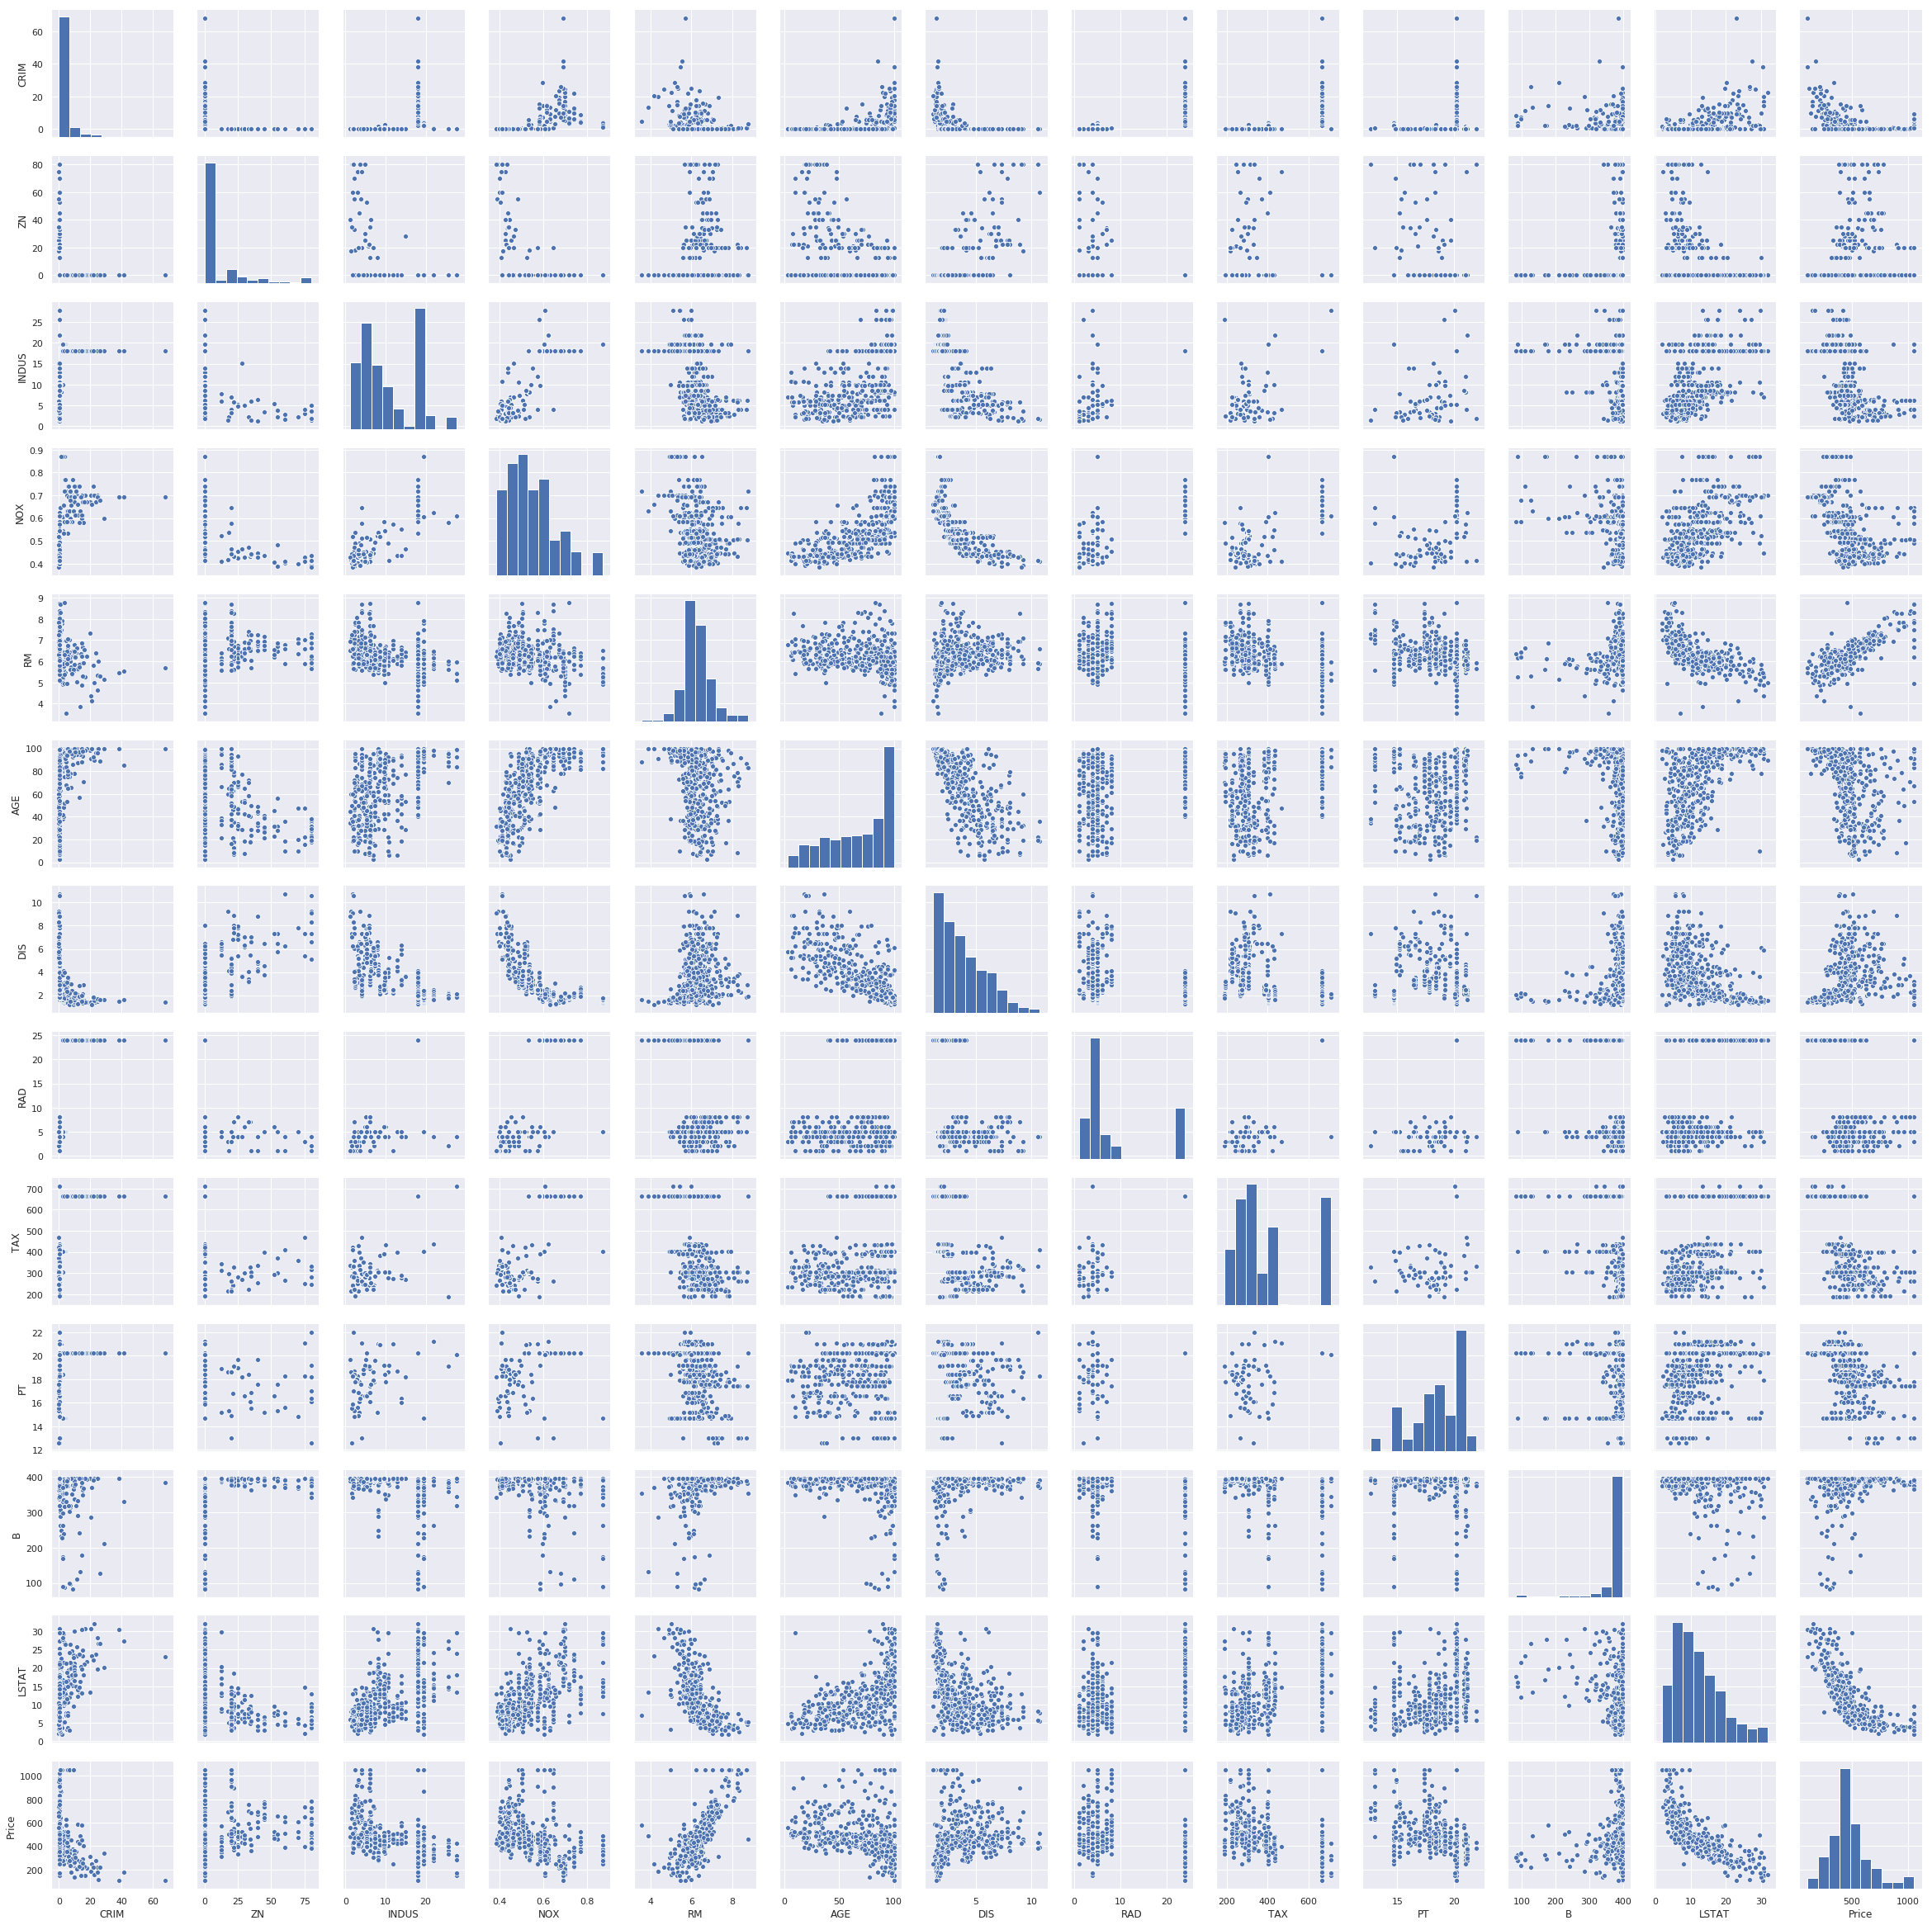

In [8]:
# pairplot

sns.pairplot(dataset);

In [26]:
# Dataset opsplitsen in training en test set

features = list(dataset.columns[:dataset.columns.size-1])
print(features)
X = dataset[features].values 
y= dataset['Price'].values

print(X.shape)

# alternatief voor het opsplitsen in training en test set
#y = dataset.Price.values
#X = dataset.drop(['Price'],axis=1)

# Nog een alternatief  voor het opsplitsen in training en test set:
# X = dataset.ix[:,0:dataset.columns.size-1].copy()    
# Y = dataset.ix[:,dataset.columns.size-1:dataset.columns.size].copy()

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PT', 'B', 'LSTAT']
(441, 12)


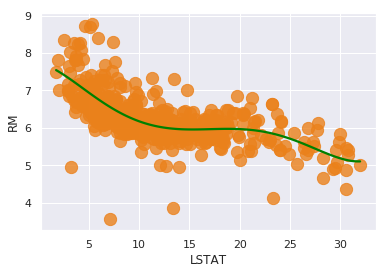

In [10]:
sns.regplot(x= dataset.LSTAT,y=dataset.RM,color='#EB811B',line_kws={'color': 'green'},ci=None,order=5,scatter_kws={'s':150},truncate=True)


In [11]:
# Opdelen in training en test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [12]:
# initialiseren en trainen van het regressiemodel
lregmodel = linear_model.LinearRegression()
lregmodel.fit(X_train,y_train)

# Coëfficiënten en intercept van het lineair regressiemodel
print('coeffs: ',lregmodel.coef_)
print('intercept', lregmodel.intercept_)

coeffs:  [-3.56141289e+00  4.05479295e-01  8.14080284e-01 -2.70514977e+02
  8.96450415e+01 -3.02997261e-01 -2.77339444e+01  7.47151897e+00
 -2.92233040e-01 -1.61741146e+01  7.62044683e-02 -1.17962045e+01]
intercept 650.6520225171147


In [13]:
# Voorspel de prijs van een huis met 
#CRIM  & ZN  & INDUS & NOX  & RM   & AGE    & DIS & RAD & TAX   & PT     & B      & LSTAT
# 0.11 & 0  &  12.03 & 0.57 & 6.80 & 89.30 & 2.39 & 1   & 273  & 21.00  & 393.45 & 6.48

house =np.array([0.11, 0,12.03,0.57,6.80,89.30,2.39 ,1 , 273 , 21.00 , 393.45 , 6.48])

price = lregmodel.predict(house.reshape(1,-1))
#print(house.reshape(1,-1).shape)
print('De prijs van het huis bedraagt: ' , price)

De prijs van het huis bedraagt:  [563.68335073]


In [14]:
# Evaluatie van het model

y_predicted = lregmodel.predict(X_test)

## Mean Absolute Error
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test,y_predicted)
print('MAE = ',MAE)

## Mean Squared Error
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test,y_predicted)
print('MSE = ',MSE)

## coefficient of determination = r2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_predicted)

print('r2 score = ',r2)

### alternatieve manier voor het bepalen van de r2 score
r2 = lregmodel.score(X_test,y_test)
print('r2 score = ', r2)

MAE =  64.0090867585709
MSE =  7803.893327394465
r2 score =  0.7542542349171305
r2 score =  0.7542542349171305


## Modeloptimalisatie en feature engineering

In [15]:
# Normalisatie
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)  # Normaliseer naar gemiddelde = 0 en standaardafwijking = 1
#scaler = preprocessing.MaxAbsScaler().fit(X_train)   # Deel elke waarde door de absolute waarde van het maximum
#scaler = preprocessing.MinMaxScaler().fit(X_train)   # Trek van elke waar het min af en deel door (MAX - MIN)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# L2 regularisatie toepassen via Ridge regression

lregmodel = Ridge(alpha=0.1,tol=0.0001,fit_intercept=True)
lregmodel.fit(X_train,y_train)
lregmodel.score(X_test,y_test)

0.7543015065295565

In [17]:
# L1 regularisatie toepassen via Lasso regression

lregmodel = Lasso(alpha=0.1,tol=0.0001,fit_intercept=True)
lregmodel.fit(X_train,y_train)
lregmodel.score(X_test,y_test)


0.7547909035292226

In [18]:
# toevoegen van extra feature: LSTAT^2 LSTAT^3
dataset2  = dataset.copy()
dataset2.insert(dataset2.columns.size-1,'LSTAT^2',dataset.LSTAT**2)
dataset2.insert(dataset2.columns.size-1,'LSTAT^3',dataset.LSTAT**3)
dataset2.insert(dataset2.columns.size-1,'LSTAT*RM',dataset.LSTAT*dataset.RM)
dataset2.insert(dataset2.columns.size-1,'LSTAT*RM^2',dataset.LSTAT*dataset.RM**2)
dataset2.insert(dataset2.columns.size-1,'LSTAT^2*RM^2',(dataset.LSTAT**2)*dataset.RM**2)
dataset2.insert(dataset2.columns.size-1,'LSTAT*AGE',dataset.LSTAT*dataset.AGE)
dataset2.insert(dataset2.columns.size-1,'LSTAT*AGE^2',dataset.LSTAT*dataset.AGE**2)
dataset2.insert(dataset2.columns.size-1,'LSTAT^2*AGE',(dataset.LSTAT**2)*dataset.AGE)
dataset2.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PT,...,LSTAT,LSTAT^2,LSTAT^3,LSTAT*RM,LSTAT*RM^2,LSTAT^2*RM^2,LSTAT*AGE,LSTAT*AGE^2,LSTAT^2*AGE,Price
0,0.00632,18.0,2.31,0.538,6.575,65.199997,4.0900,1,296,15.300000,...,4.98,24.800400,123.505993,32.743499,215.288501,1072.136738,324.695986,21170.177300,1616.986017,504.000000
1,0.02731,0.0,7.07,0.469,6.421,78.900002,4.9671,2,242,17.799999,...,9.14,83.539606,763.552030,58.687942,376.835277,3444.274564,721.146041,56898.423742,6591.275063,453.600008
2,0.02729,0.0,7.07,0.469,7.185,61.099998,4.9671,2,242,17.799999,...,4.03,16.240902,65.450837,28.955551,208.045634,838.423950,246.233007,15044.836331,992.319069,728.700016
3,0.03237,0.0,2.18,0.458,6.998,45.799999,6.0622,3,222,18.700001,...,2.94,8.643600,25.412185,20.574121,143.977701,423.294448,134.652000,6167.061515,395.876889,701.400032
4,0.06905,0.0,2.18,0.458,7.147,54.200001,6.0622,3,222,18.700001,...,5.33,28.408899,151.419431,38.093509,272.254300,1451.115396,288.886000,15657.621416,1539.762358,760.200016


In [19]:
features = list(dataset2.columns[:dataset2.columns.size-1])
print(features)
X = dataset2[features].values 
y= dataset2['Price'].values
# splits op in training set en test set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=0)

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PT', 'B', 'LSTAT', 'LSTAT^2', 'LSTAT^3', 'LSTAT*RM', 'LSTAT*RM^2', 'LSTAT^2*RM^2', 'LSTAT*AGE', 'LSTAT*AGE^2', 'LSTAT^2*AGE']


In [20]:
# trainen en testen van het model
lregmodel2 = linear_model.LinearRegression()
lregmodel2.fit(X_train_2,y_train_2)

r2score_2 = lregmodel2.score(X_test_2,y_test_2)
print(r2score_2)


0.8501526177858948


In [21]:
# met L2 regularisatie via Ridge regression
lregmodel2 = Ridge(alpha=1,tol=0.0001,fit_intercept=True)
lregmodel2.fit(X_train_2,y_train_2)
lregmodel2.score(X_test_2,y_test_2)


0.8433943179090944

In [22]:
# met L1 regularisatie via Lasso regression
lregmodel2 = Lasso(alpha=0.5,tol=0.0001,fit_intercept=True)
lregmodel2.fit(X_train_2,y_train_2)
lregmodel2.score(X_test_2,y_test_2)


/home/wouter/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.8437113338085345

In [23]:
# Via KernelRidge met een polynomial kernel

from sklearn.kernel_ridge import KernelRidge

lregmodel3 = KernelRidge(alpha=1, degree=3, gamma=None, kernel='polynomial')
lregmodel3.fit(X_train,y_train)


y_predicted = lregmodel3.predict(X_train)
r2 = r2_score(y_train,y_predicted)

print('training set: ',r2)

y_predicted = lregmodel3.predict(X_test)
r2 = r2_score(y_test,y_predicted)

print('test set: ',r2)




training set:  0.9295311464077407
test set:  0.8675498041975732


In [24]:
# Automatisch toevoegen van hogere orde features

from sklearn.preprocessing import PolynomialFeatures


# Aanmaken van de hogere orde features
graad = 3

poly = PolynomialFeatures(graad)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print('dimensie van X_train_poly: ',X_train_poly.shape)
print('dimensie van X_test_poly: ',X_test_poly.shape)


# met L2 regularisatie via Ridge regression
lregmodel_poly = Ridge(alpha=100,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)

print('R2 score via L2: ',lregmodel_poly.score(X_test_poly,y_test))
# R2 -score via L2 op de trainingset
print('R2 score op training set via L2: ',lregmodel_poly.score(X_train_poly,y_train))


# met L1 regularisatie via Lasso regression
lregmodel_poly = Lasso(alpha=3,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)      
  
      
print('R2 score via L1: ',lregmodel_poly.score(X_test_poly,y_test))
  
# R2 -score via L1 op de trainingset
print('R2 score op training set via L1: ',lregmodel_poly.score(X_train_poly,y_train))    
  

dimensie van X_train_poly:  (295, 455)
dimensie van X_test_poly:  (146, 455)
R2 score via L2:  0.8252522817302425
R2 score op training set via L2:  0.9309049016813458
R2 score via L1:  0.8635471590184725
R2 score op training set via L1:  0.9175970816811108
